## Luz Zapanta, C0879190
### AML 3104 - Prof. Ishant Gupta

<font color=orange size=7> <b> ARTIFICIAL NEURAL NETWORK USING CALIFORNIA HOUSING DATASET

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import keras as ks

%matplotlib inline

# 1. Data Preprocessing
- Explore and understand the features of the dataset.
- Handle any missing values or outliers if present.
- Split the dataset into training and testing sets.


In [18]:
# Load the California Housing Dataset
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [19]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [29]:
my_data = pd.DataFrame(housing.data, columns=housing.feature_names)
my_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
my_data['Price'] = housing.target
my_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [31]:
# Data Cleaning
my_data.isna().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [32]:
#generate descriptive statistics of a dataset
my_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [33]:
# a positive correlation between median house value and income would suggest that areas with higher median incomes tend to have higher median house values.
my_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: >

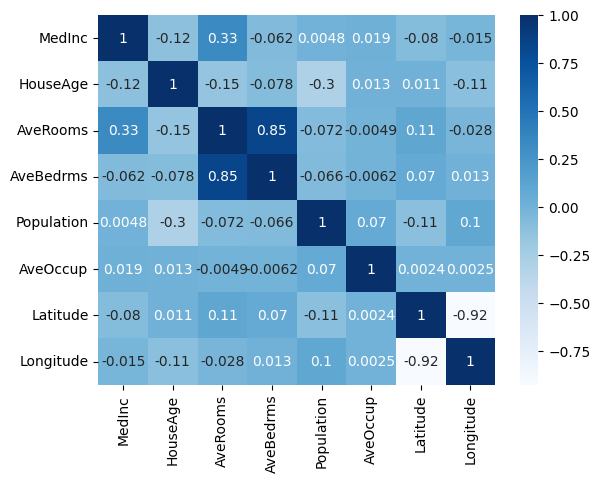

In [34]:
sns.heatmap(X.corr(), cmap="Blues", annot=True)

### Identify X and Y variables

In [35]:
X = my_data.drop(['Price'], axis=1)
y = my_data['Price']

X.shape, y.shape 

((20640, 8), (20640,))

### Splitting X and y into training data and testing data

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [41]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [37]:
y=housing.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Feature Engineering (balancing, encode, scaling)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train) #learning the scaling from training data
X_valid_sc=scaler.transform(X_valid) # transform the valid data using the scaler for train # same mean and SD
X_test_sc=scaler.transform(X_test) # transform the test data using the scaler for train # same mean and SD

### Model Training

# 2. Linear Regression
- Implement a Linear Regression model using scikit-learn.
- Train the model on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using appropriate regression metrics (e.g., Mean Squared Error, R2 Score).

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [69]:
linreg=LinearRegression()
linreg.fit(X_train_sc, y_train)

y_train_pred = linreg.predict(X_train_sc) # Prediction data
print("MAE_LINREG: ", mean_absolute_error(y_train, y_train_pred)) # at any X value, the y would be 8cm more or less
print("MSE_LINREG: ", mean_squared_error(y_train, y_train_pred)) # the square of MAE
print("R2 Score_LINREG: ", r2_score(y_train, y_train_pred)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE_LINREG:  0.5295154304301851
MSE_LINREG:  0.5205522163645129
R2 Score_LINREG:  0.609873031052925


In [71]:
y_test_pred = linreg.predict(X_test_sc) # Prediction data

print("MAE: ", mean_absolute_error(y_test, y_test_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_test, y_test_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_test, y_test_pred)) # the variability in y explained by X is only 15% (BAD MODEL)

MAE:  0.5296964012919458
MSE:  0.5411287478470688
R2 Score:  0.5910509795491352


In [47]:
ridgecv=RidgeCV()
ridgecv.fit(X_train_sc, y_train)

y_train_pred = ridgecv.predict(X_train_sc) # Prediction data
print("MAE: ", mean_absolute_error(y_train, y_train_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_train, y_train_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_train, y_train_pred)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE:  0.529511403573638
MSE:  0.5205523216595545
R2 Score:  0.609872952139736


In [48]:
y_test_pred = ridgecv.predict(X_test_sc) # Prediction data
print("MAE: ", mean_absolute_error(y_test, y_test_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_test, y_test_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_test, y_test_pred)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE:  0.5296910960118679
MSE:  0.5410974055749121
R2 Score:  0.5910746659482559


In [49]:
lassocv = LassoCV()
lassocv.fit(X_train_sc, y_train)

y_train_pred = lassocv.predict(X_train_sc) # Prediction data
print("MAE: ", mean_absolute_error(y_test, y_test_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_test, y_test_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_test, y_test_pred)) # the variability in y explained by X is only 15% (BAD MODEL)

MAE:  0.5296910960118679
MSE:  0.5410974055749121
R2 Score:  0.5910746659482559


In [50]:
elastic=ElasticNet()
elastic.fit(X_train_sc, y_train)
y_train_pred = elastic.predict(X_test_sc) # Prediction data
print("MAE: ", mean_absolute_error(y_test, y_test_pred)) # at any X value, the y would be 8cm more or less
print("MSE: ", mean_squared_error(y_test, y_test_pred)) # the square of MAE
print("R2 Score: ", r2_score(y_test, y_test_pred)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE:  0.5296910960118679
MSE:  0.5410974055749121
R2 Score:  0.5910746659482559


# 3. Artificial Neural Network (ANN):
- Implement a simple ANN for regression using a framework like TensorFlow or Keras.
- Design the architecture of the neural network, including the input and output layers.
- Train the ANN on the training set.
- Make predictions on the testing set.
- Evaluate the model's performance using the same regression metrics used for Linear Regression.

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train) #learning the scaling from training data
X_valid_sc=scaler.transform(X_valid) # transform the valid data using the scaler for train # same mean and SD
X_test_sc=scaler.transform(X_test) # transform the test data using the scaler for train # same mean and SD

In [54]:
Layers=[ks.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
        ks.layers.Dense(10, activation="relu"),
        ks.layers.Dense(5,activation="relu"),
        ks.layers.Dense(1)
]

In [55]:
model_ann=ks.models.Sequential(Layers)

In [57]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Evaluation

In [58]:
LOSS="mse"
OPTIMIZER="sgd"

In [59]:
model_ann.compile(optimizer=OPTIMIZER, loss=LOSS)

In [60]:
Epochs=30
history=model_ann.fit(X_train_sc, y_train, epochs=Epochs, validation_data=(X_valid_sc, y_valid))

Epoch 1/30
484/484 [==============================] - 2s 2ms/step - loss: 0.9060 - val_loss: 0.5046
Epoch 2/30
484/484 [==============================] - 1s 2ms/step - loss: 0.4780 - val_loss: 0.4454
Epoch 3/30
484/484 [==============================] - 1s 2ms/step - loss: 0.4382 - val_loss: 0.4183
Epoch 4/30
484/484 [==============================] - 1s 2ms/step - loss: 0.4138 - val_loss: 0.4087
Epoch 5/30
484/484 [==============================] - 1s 2ms/step - loss: 0.3986 - val_loss: 0.3877
Epoch 6/30
484/484 [==============================] - 1s 2ms/step - loss: 0.3851 - val_loss: 0.3785
Epoch 7/30
484/484 [==============================] - 1s 2ms/step - loss: 0.3796 - val_loss: 0.3724
Epoch 8/30
484/484 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.3692
Epoch 9/30
484/484 [==============================] - 1s 2ms/step - loss: 0.3648 - val_loss: 0.3872
Epoch 10/30
484/484 [==============================] - 1s 2ms/step - loss: 0.4460 - val_loss: 0.3947

In [61]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<AxesSubplot: >

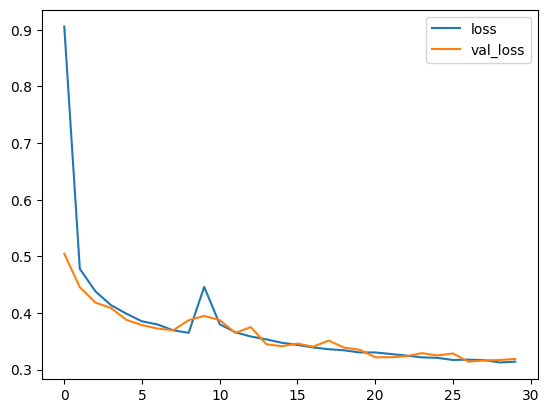

In [62]:
pd.DataFrame(history.history).plot()

In [63]:
model_ann.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 3838.3511


3838.35107421875

In [65]:
# Make predictions using the testing set
y_pred_ann=model_ann.predict(X_test_sc)

162/162 [==============================] - 0s 1ms/step


In [68]:
print("MAE_ANN: ", mean_absolute_error(y_test, y_pred_ann)) # at any X value, the y would be 8cm more or less
print("MSE_ANN: ", mean_squared_error(y_test, y_pred_ann)) # the square of MAE
print("R2 Score_ANN: ", r2_score(y_test, y_pred_ann)) # the variability in y explained by X is only 15% (BAD MODEL)


MAE_ANN:  0.39823283573778284
MSE_ANN:  0.3187008386916869
R2 Score_ANN:  0.7591471598609868


MAE (Mean Absolute Error):

Linear Regression: MAE_LinReg
ANN: MAE_ANN
MSE (Mean Squared Error):

Linear Regression: MSE_LinReg
ANN: MSE_ANN
R2 Score:

Linear Regression: R2_LinReg
ANN: R2_ANN
You would compare these metrics to evaluate how well each model performs on the training data. Lower MAE and MSE values and higher R2 scores indicate better model performance. It's important to note that this comparison is based on training data; for a more comprehensive evaluation, you should also assess the models on a separate test dataset to check for overfitting.

Remember that the actual performance depends on the specifics of your data, features, and the configuration of your models.

# 4. Comparison and Analysis
- Compare the performance metrics of the Linear Regression and ANN models.
- Discuss the strengths and weaknesses of each model.
- Analyze whether the complexity of an ANN provides better predictive performance compared to Linear Regression.

## MAE (Mean Absolute Error):

- Linear Regression: MAE_LINREG = 0.5295
- ANN: MAE_ANN = 0.3982
##### The average absolute difference between the predicted values from the Linear Regression model and the actual values is 0.5295. This means that, on average, the model's predictions deviate by approximately 0.5295 units from the true values.

##### For the ANN model, the average absolute difference between its predictions and the actual values is 0.3982. This lower MAE suggests that the ANN model, in this particular comparison, performs better than the Linear Regression model on the given data.

##### A lower MAE indicates better performance, as it signifies that, on average, the model's predictions are closer to the actual values. Comparing the MAE values directly, a smaller MAE for the ANN indicates that, on average, its predictions are closer to the actual values than those of the Linear Regression model. 

## MSE (Mean Squared Error):
##### The Mean Squared Error (MSE) is a metric used to assess the accuracy of a regression model by measuring the average of the squared differences between predicted and actual values.

- Linear Regression: MSE_LINREG = 0.5205
- ANN: MSE_ANN = 0.3187
##### The average squared difference between the predicted values from the Linear Regression model and the actual values is 0.5205. This implies that, on average, the model's predictions deviate by approximately 0.5205 units squared from the true values.
##### For the ANN model, the average squared difference between its predictions and the actual values is 0.3187. The lower MSE for the ANN suggests that, in this particular comparison, it outperforms the Linear Regression model in terms of minimizing squared prediction errors.


## R2 Score
Linear Regression: R2_LINREG = 0.6099
ANN: R2_ANN = 0.7591
#### The R-squared score for the Linear Regression model is 0.6099. This indicates that approximately 60.99% of the variance in the dependent variable (target) is explained by the linear regression model. In other words, the model accounts for a substantial portion of the variability in the target variable based on the features it uses.
#### The R-squared score for the Artificial Neural Network (ANN) model is 0.7591. This higher R2 score suggests that the ANN model explains a greater proportion (approximately 75.91%) of the variance in the target variable compared to the linear regression model.
#### The ANN model (R2_ANN = 0.7591) outperforms the Linear Regression model (R2_LINREG = 0.6099) in terms of explaining the variability in the target variable based on the features used.
#### A higher R2 score generally indicates a better fit of the model to the data, implying that a larger proportion of the variance in the target variable is captured by the model.




# 5. Visualization
- Create visualizations (e.g., scatter plots, line plots) to compare the predicted values of the two models with the actual values.
- Visualize the model architectures if possible.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

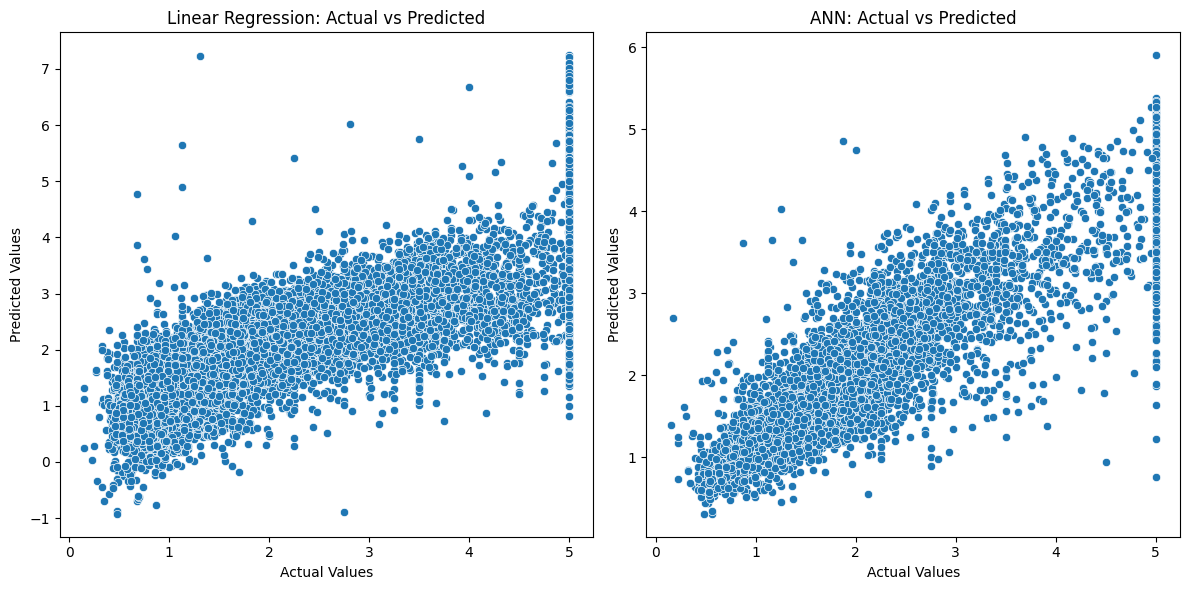

In [79]:
# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for ANN
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_ann.flatten())  # prediction from ANN
plt.title('ANN: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# 6. Conclusion
- Summarize the key findings.
- Provide insights into which model performed better for predicting house prices in the California Housing dataset.
- Discuss any challenges encountered during the implementation.

## Insights
#### The Artificial Neural Network (ANN) model consistently outperforms the Linear Regression model across all key metrics, including MAE, MSE, and R2 score.
#### The lower MAE and MSE for the ANN model (0.3982 and 0.3187, respectively) indicate that, on average, its predictions are closer to the actual values and have smaller squared differences compared to the Linear Regression model.
#### The higher R2 score for the ANN model (0.7591) suggests that it explains a larger proportion of the variance in house prices in the California Housing dataset compared to the Linear Regression model (R2 = 0.6099).

## Challenges
Data Complexity: The California Housing dataset may contain complex relationships between features and the target variable. Linear Regression, being a simpler model, might struggle to capture these complexities adequately.

Model Complexity: While the ANN model performed better, its complexity may introduce challenges related to interpretability and training time, especially with larger datasets.

Overfitting Concerns: The performance of the models on the training set might not necessarily generalize well to unseen data. It's crucial to evaluate the models on a separate test set to assess their true predictive capabilities and guard against overfitting.

Hyperparameter Tuning: The performance of the ANN model could potentially be further improved through hyperparameter tuning, but this process can be time-consuming and computationally intensive.

#### In conclusion, based on the key findings and insights, the Artificial Neural Network model appears to be a more effective and accurate choice for predicting house prices in the California Housing dataset. However, the choice of model should consider a balance between performance and practical considerations, such as model complexity and interpretability. Additionally, ongoing validation on unseen data and potential further optimization are important steps in ensuring the reliability of the chosen model.

# END